# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import mode
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#Memuat Dataset

health_df = pd.read_csv("https://raw.githubusercontent.com/LailaWulandarii/BMLP_Dataset/refs/heads/main/health_data.csv")
health_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Memahami Struktur data dan mengecek missing value

#Meninjau informasi lengkap dataset
print("Informasi lengkap dataset:")
print(health_df.info())
print("\n")

#Meninjau jumlah data kosong
print("Jumlah data kosong:")
print(health_df.isnull().sum())
print("\n")

Informasi lengkap dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB
None


Jumlah data kosong:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0

**1. Memahami struktur data dan mengecek missing value**

Berdasarkan proses ini, dapat dilihat bahwa:
1. Dataset memiliki 5.110 baris dengan 10 kolom, hal ini menunjukkan bahwa dataset cukup besar untuk analisis yang bermakna.
2. Dataset memiliki variasi data numerikal dan data kategorikal.
3. Kolom BMI memiliki missing values, yang akan ditangani dengan mengisi menggunakan median.



Informasi lengkap dataset:
               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi  
count  4909.000000  
mean     28.893237  
std       7.854067  
min      10.300000  
25%      23.500000  
50%      28.100000  
75%      33.100000  
max      97.600000  



Histogram Distribusi:


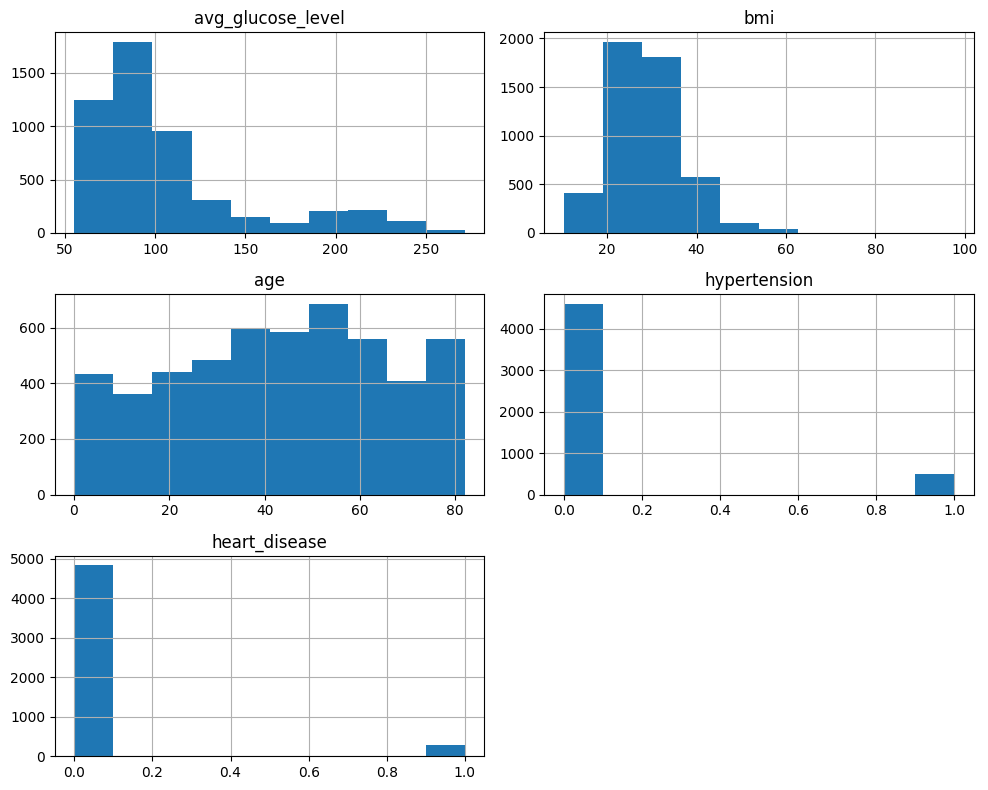


Visualisasi Korelasi:


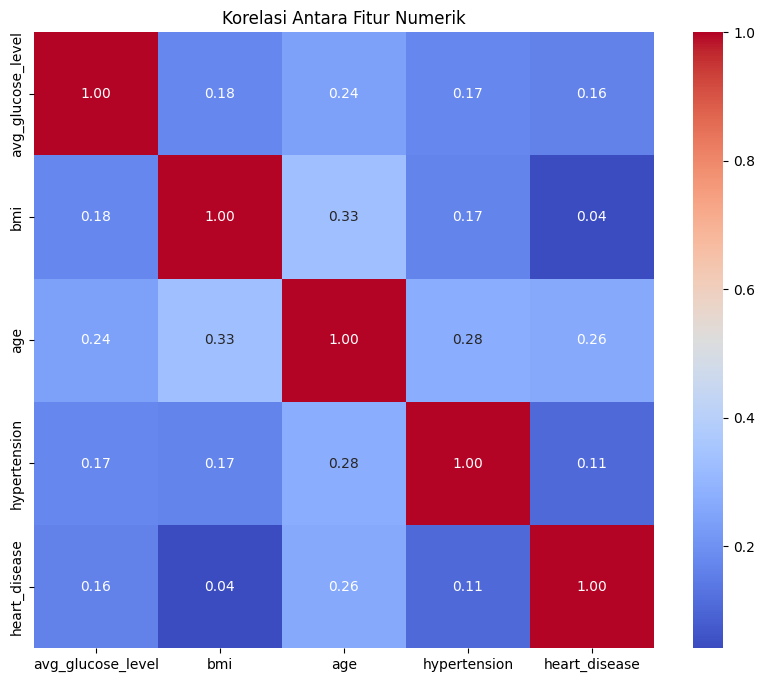

In [ ]:
#Analisis Distribusi dan Korelasi Kolom Numerik

#Meninjau statistik deskriptif untuk kolom numerik
print("Informasi lengkap dataset:")
print(health_df.describe())
print("\n")

#Analisis dengan plot histogram
print("\nHistogram Distribusi:")
health_df[["avg_glucose_level",	"bmi", "age",	"hypertension",	"heart_disease"]].hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

#Menghitung korelasi antar kolom variabel numerik
corr = health_df[["avg_glucose_level",	"bmi", "age",	"hypertension",	"heart_disease"]].corr()

#Visualisasi korelasi dengan heatmap
print("\nVisualisasi Korelasi:")
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antara Fitur Numerik")
plt.show()

**2. Analisis Distribusi dan Korelasi Kolom Numerik**

Pada tahap ini dapat disimpulkan sebagai berikut:
1. **Analisis distribusi dengan histogram.**


*   Data menunjukkan bahwa tingkat glukosa rata-rata sebagian besar berkisar antara 50 hingga 150 dengan puncak sekitar 100, mencerminkan kebanyakan individu berada dalam rentang normal.
*  Distribusi BMI sebagian besar berada antara 20 hingga 40 dengan puncak di sekitar 25, mengindikasikan nilai yang umum berada dalam kategori normal.
*  Usia menunjukkan puncak pada beberapa kelompok umur yaitu sekitar 10, 50, dan 60, yang mungkin merepresentasikan fokus dataset pada kelompok usia tertentu.
*  Hipertensi dan penyakit jantung jarang ditemukan dalam dataset, dengan sebagian besar individu tidak memiliki kondisi tersebut, berdasarkan distribusi nilai di kolom masing-masing.
2. **Korelasi antar variabel dengan heatmap**
*  Fitur age memiliki korelasi moderat dengan hipertensi (0.28) dan penyakit jantung (0.26), menunjukkan hubungan linier yang signifikan dibandingkan fitur lainnya.
*  Tingkat glukosa rata-rata (avg_glucose_level) memiliki hubungan yang lemah dengan usia (0.24) dan sedikit terkait dengan hipertensi (0.17) dan penyakit jantung (0.16).
*  BMI juga menunjukkan korelasi moderat dengan usia (0.32), tetapi hampir tidak berkaitan dengan penyakit jantung (0.04).

<ipython-input-7-5b4a84b57e77>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=health_df, x='gender', palette='Set2', ax=axes[0, 0])
<ipython-input-7-5b4a84b57e77>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=health_df, x='smoking_status', palette='Set2', ax=axes[0, 1])
<ipython-input-7-5b4a84b57e77>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=health_df, x='ever_married', palette='Set2', ax=axes[0, 2])
<ipython-input-7-5b4a84b57e77>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

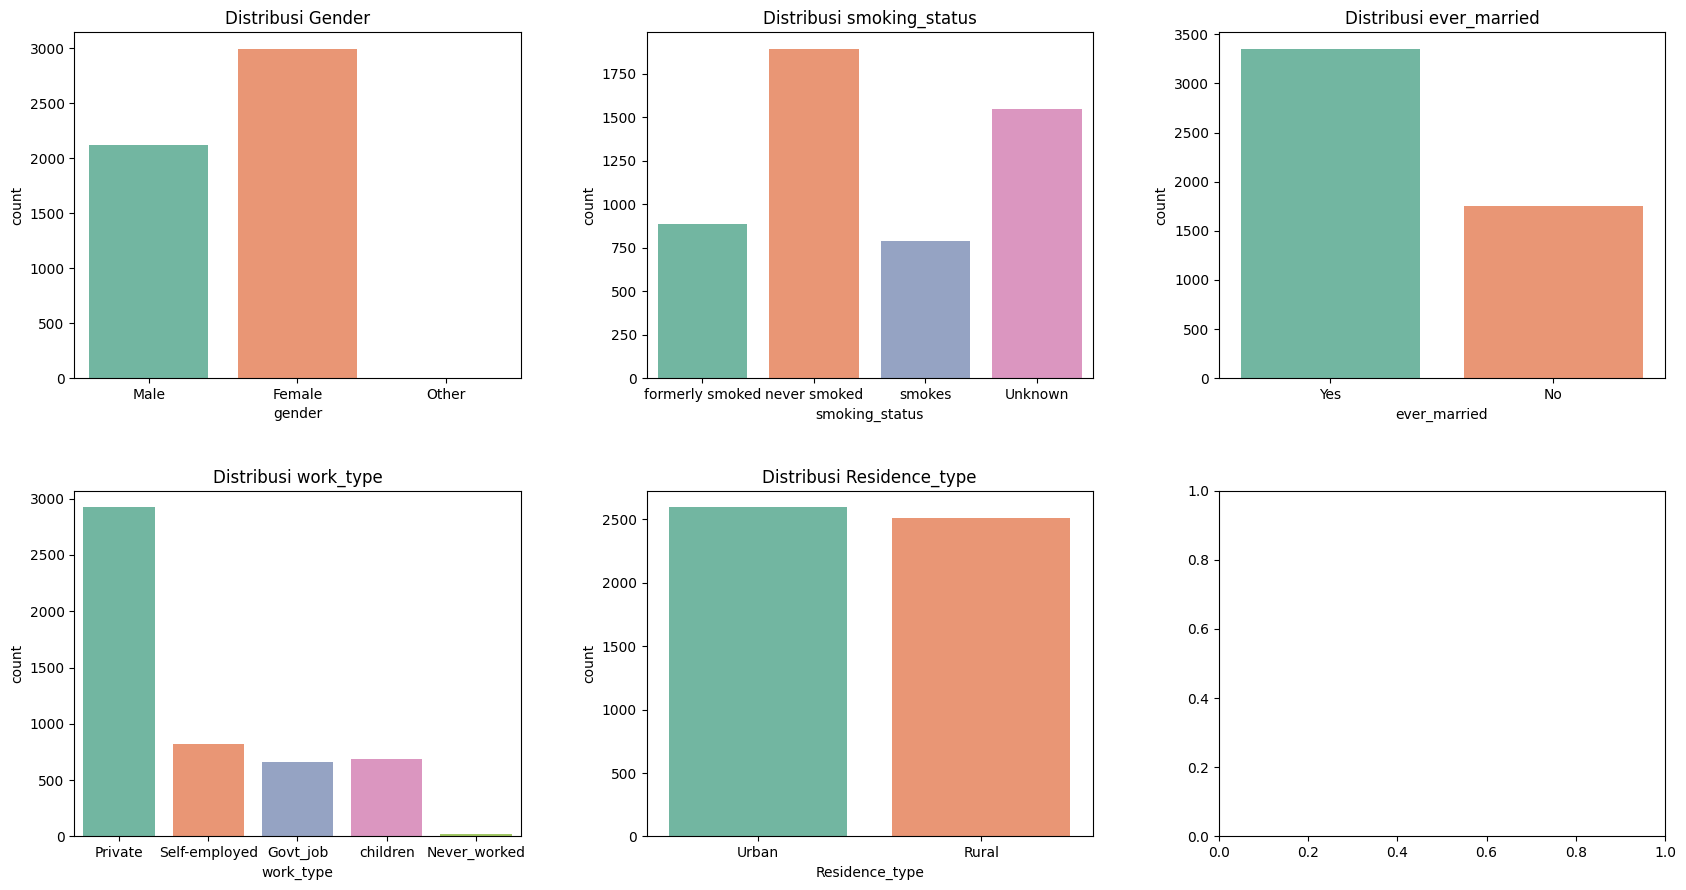

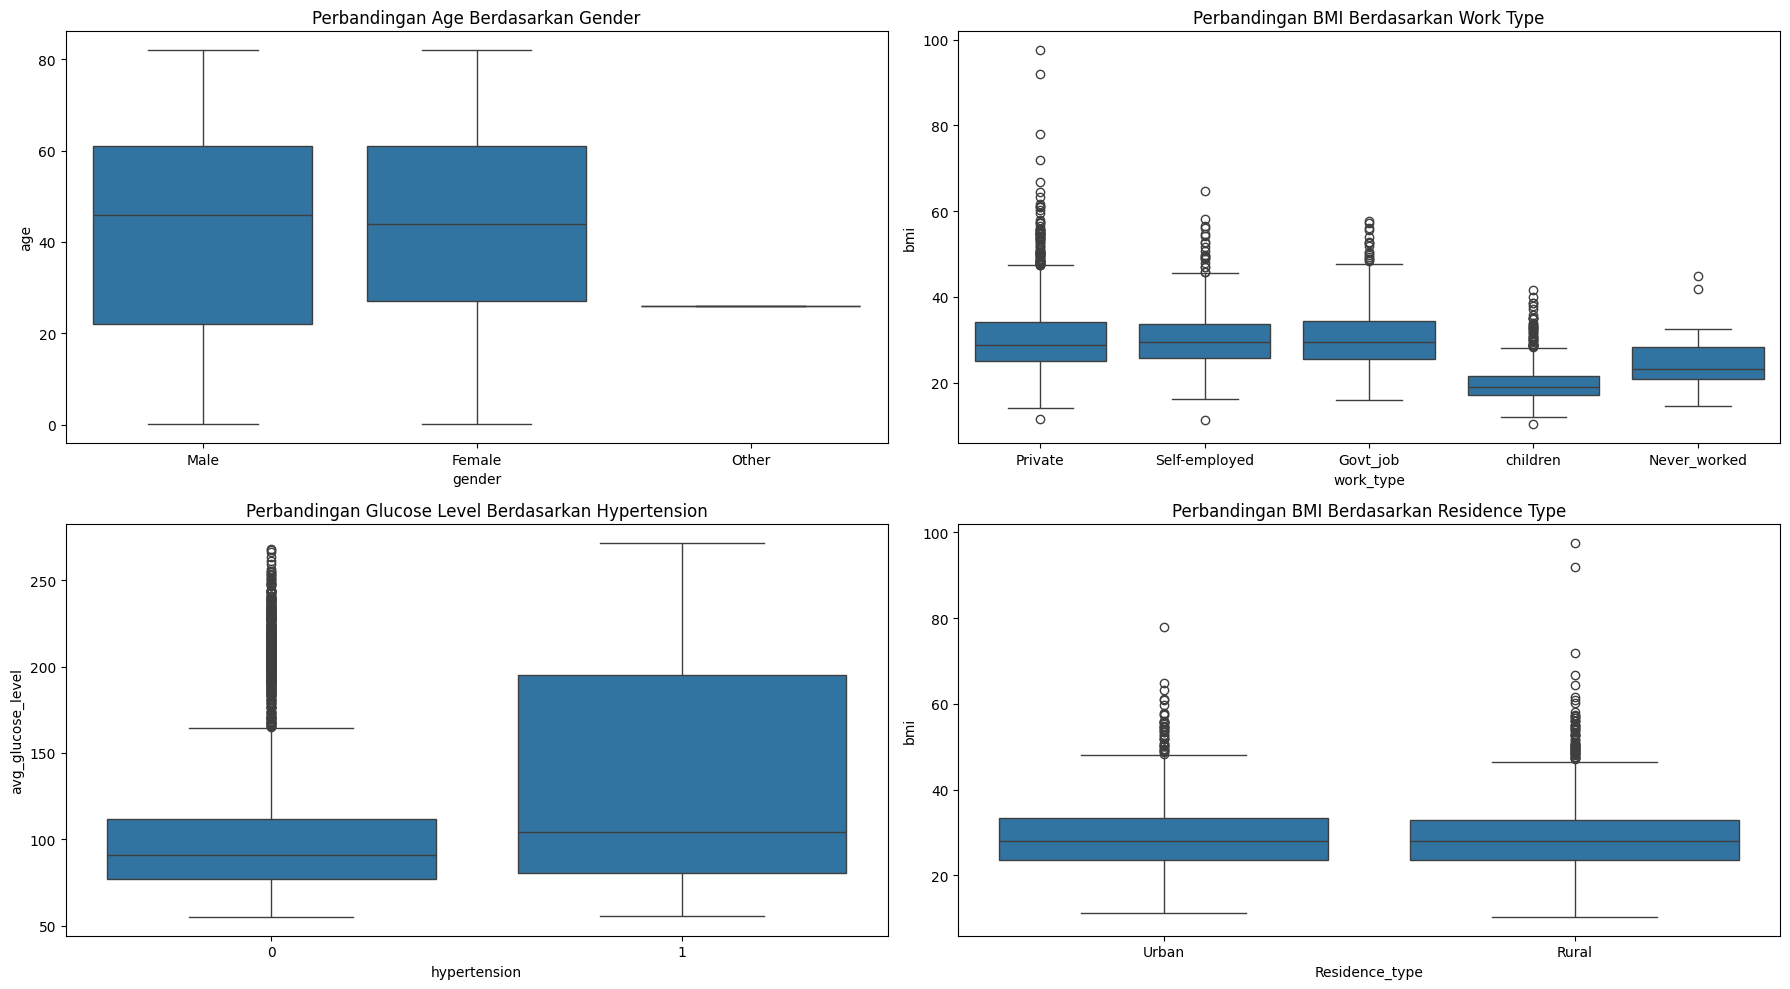

In [ ]:
#Distribusi Kolom Kategorikal dan Perbandingan dengan Kolom Numerik

#Distribusi Kolom Kategorikal
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=6.0)

sns.countplot(data=health_df, x='gender', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Gender')

sns.countplot(data=health_df, x='smoking_status', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Distribusi smoking_status')

sns.countplot(data=health_df, x='ever_married', palette='Set2', ax=axes[0, 2])
axes[0, 2].set_title('Distribusi ever_married')

sns.countplot(data=health_df, x='work_type', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi work_type')

sns.countplot(data=health_df, x='Residence_type', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Residence_type')


#Perbandingan Kolom Kategorikal dengan Numerik
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.tight_layout(pad=6.0)

sns.boxplot(data=health_df, x='gender', y='age', ax=axes[0, 0])
axes[0, 0].set_title('Perbandingan Age Berdasarkan Gender')

sns.boxplot(data=health_df, x='work_type', y='bmi', ax=axes[0, 1])
axes[0, 1].set_title('Perbandingan BMI Berdasarkan Work Type')

sns.boxplot(data=health_df, x='hypertension', y='avg_glucose_level', ax=axes[1, 0])
axes[1, 0].set_title('Perbandingan Glucose Level Berdasarkan Hypertension')

sns.boxplot(data=health_df, x='Residence_type', y='bmi', ax=axes[1, 1])
axes[1, 1].set_title('Perbandingan BMI Berdasarkan Residence Type')

plt.tight_layout()
plt.show()


**3. Distribusi Kolom Kategorikal dan Perbandingan dengan Kolom Numerik**

Pada tahap ini dapat disimpulkan sebagai berikut:
1. **Distribusi kolom kategorikal**
Mayoritas data menunjukkan bahwa kategori Female mendominasi dalam fitur Gender, sedangkan kategori Never Smoked menjadi yang paling umum dalam Smoking Status. Sebagian besar individu pernah menikah (Yes) dan bekerja di sektor privat (Private) berdasarkan fitur Ever Married dan Work Type. Sementara itu, tipe tempat tinggal menunjukkan distribusi yang seimbang antara Urban dan Rural.

2. **Perbandingan kolom kategorikal dengan numerik**
Hasil analisis box plot menunjukkan bahwa distribusi usia untuk Male dan Female serupa dengan variasi yang lebih kecil pada kategori Other. BMI cenderung lebih tinggi pada individu yang bekerja di sektor Private dan Self-employed, sementara kategori Children memiliki nilai BMI lebih rendah. Individu dengan hipertensi menunjukkan tingkat glukosa rata-rata yang lebih tinggi dibandingkan yang tidak, menunjukkan potensi risiko metabolik. Selain itu, tipe tempat tinggal (Urban dan Rural) tidak menunjukkan perbedaan signifikan dalam distribusi BMI, menandakan bahwa lokasi tempat tinggal tidak memengaruhi BMI secara mencolok dalam dataset ini.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [3]:

#Mengubah kolom boolean menjadi integer
health_df['hypertension'] = health_df['hypertension'].astype(int)
health_df['heart_disease'] = health_df['heart_disease'].astype(int)

#Encoding fitur kategorikal menggunakan label encoding
mapping_dict = {
    'gender': {'Male': 0, 'Female': 1, 'Other': 2},
    'ever_married': {'No': 0, 'Yes': 1},
    'work_type': {'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4},
    'Residence_type': {'Rural': 0, 'Urban': 1},
    'smoking_status': {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}
}

for col, mapping in mapping_dict.items():
    health_df[col] = health_df[col].map(mapping)

#Mengisi missing values sebelum scaling
health_df['bmi'] = health_df['bmi'].fillna(health_df['bmi'].median())

#Menggunakan Winsorization untuk menangani outlier
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_features:
    #mengganti nilai di luar batas 5% dan 95% dengan nilai kuantil 5% dan 95%
    health_df[col] = winsorize(health_df[col], limits=[0.05, 0.05])

#Standarisasi data dengan StandardScaler
scaler = StandardScaler()
health_df.loc[:, numerical_features] = scaler.fit_transform(health_df[numerical_features])

#Menampilkan data setelah preprocessing
print("\nData Setelah Preprocessing (Standarisasi dan Winsorization):")
print(health_df.head())


Data Setelah Preprocessing (Standarisasi dan Winsorization):
   gender       age  hypertension  heart_disease  ever_married  work_type  \
0       0  1.065847             0              1             1          3   
1       1  0.795961             0              0             1          4   
2       0  1.605620             0              1             1          3   
3       1  0.256189             0              0             1          3   
4       1  1.605620             1              0             1          4   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0               1           2.577516  1.188594               0  
1               0           2.248059 -0.080761               1  
2               0           0.009288  0.576317               1  
3               1           1.527765  0.860055               2  
4               0           1.594958 -0.693039               1  


**Preprocessing Data**

Pada tahap ini dilakukan beberapa hal sebagai berikut:
1. Mengubah kolom boolean (hypertension, heart_disease) menjadi format numerik (0/1) untuk mempermudah analisis.
2. Melakukan encoding untuk fitur kategorikal menggunakan Mapping, seperti gender, ever_married, work_type, Residence_type, dan smoking_status, sehingga data berubah menjadi angka (0, 1, 2, dst.).
3. Menangani missing values dengan mengisi nilai kosong pada kolom bmi menggunakan nilai median agar distribusi data tetap konsisten.
4. Mengatasi outlier menggunakan Winsorization pada kolom numerik (age, avg_glucose_level, bmi), mengganti nilai ekstrem di luar kuantil 5% dan 95% untuk mengurangi efek negatif dari data ekstrem.
5. Melakukan standarisasi pada data numerik (age, avg_glucose_level, bmi) menggunakan StandardScaler untuk memastikan data terdistribusi dengan rata-rata 0 dan standar deviasi 1.


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [5]:
#Penerapan K-Means Menggunakan Semua Fitur
X = health_df
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++')
labels = kmeans.fit_predict(X)

#Cek Silhouette Score
silhouette_a = silhouette_score(X, labels)
print(f"Silhouette Score untuk K={k} dengan semua fitur: {silhouette_a:.4f}")

Silhouette Score untuk K=4 dengan semua fitur: 0.2435


**Penerapan K-Means Menggunakan Semua Fitur**

Pada tahap ini dilakukan beberapa hal sebagai berikut:
1. Menerapkan algoritma K-Means dengan cluster awal 4 dan menghitung centroid cluster untuk memahami pusat data.
3. Menggunakan PCA untuk mengubah data menjadi 2 dimensi dan menghitung silhouette score.
4. Memvisualisasikan distribusi data berdasarkan cluster lengkap dengan centroidnya menggunakan scatter plot.

Hasilnya pemisahan cluster kurang tegas dan silhouette score masih rendah (0.2435), sehingga akan dilakukan evaluasi.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

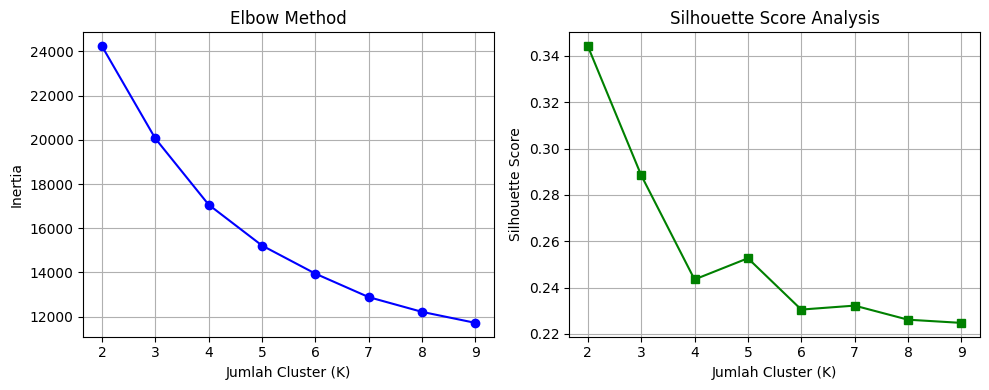

In [6]:
# Elbow dan Silhouette Score analysis

K_range = range(2, 10)
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++')
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

#Visualisasi Elbow & Silhouette Score
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', color='blue')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.grid(True)

plt.tight_layout()
plt.show()

**Evaluasi Model Clustering dengan Silhouette Score dan Elbow Method**

Hasil evaluasi:
1. Grafik menunjukkan penurunan inertia yang signifikan dari K=2 hingga K=4, kemudian penurunan mulai melambat setelahnya. Titik siku (elbow) terlihat pada cluster ke-4, yang mengindikasikan kemungkinan jumlah cluster optimal berada di sekitar angka tersebut.
2. Skor tertinggi tercatat pada cluster ke-2 (sekitar 0.34), namun nilai tersebut justru menurun secara konsisten seiring bertambahnya jumlah cluster. Pada K=4 (titik elbow), skor hanya berada di sekitar 0.24, yang menunjukkan kualitas pemisahan cluster yang kurang baik.

Kesimpulan:

Meskipun elbow method menyarankan K=4 sebagai titik optimal berdasarkan penurunan inertia, nilai silhouette score yang rendah menunjukkan bahwa pembentukan cluster belum cukup optimal. Hal ini kemungkinan disebabkan oleh keberadaan fitur yang kurang relevan atau redundan dalam data. Oleh karena itu, perlu dilakukan feature selection atau reduksi dimensi untuk meningkatkan kualitas hasil clustering dan mendapatkan struktur klaster yang lebih jelas.



## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [7]:
#Feature Selection

# Pilih 5 fitur yang paling relevan
selected_features = ['Residence_type', 'gender', 'heart_disease', 'hypertension', 'work_type',]
X_selected = health_df[selected_features]

#Reduksi dimensi dengan menerapkan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

#Melatih model KMeans dengan fitur terpilih
kmeans_selected = KMeans(n_clusters=4, random_state=42, n_init=10, init='k-means++')
labels = kmeans_selected.fit_predict(X_pca)

#Cek Silhouette Score
silhouette_selected = silhouette_score(X_pca, labels)
print(f"Silhouette Score dengan feature selection + PCA: {silhouette_selected:.4f}")



Silhouette Score dengan feature selection + PCA: 0.7589


**Feature Selection**

Penerapan feature selection dengan memilih fitur yang paling relevan, dikombinasikan dengan reduksi dimensi menggunakan PCA serta pemilihan jumlah cluster optimal (K=4) berdasarkan metode Elbow, berhasil meningkatkan performa model. Hasil evaluasi menunjukkan silhouette score sebesar 0.7589, yang menandakan kualitas pemisahan cluster sangat baik. Hal ini menunjukkan bahwa pemrosesan lanjutan seperti feature selection dan PCA mampu menghasilkan struktur klaster yang lebih jelas dan optimal dibandingkan sebelumnya.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

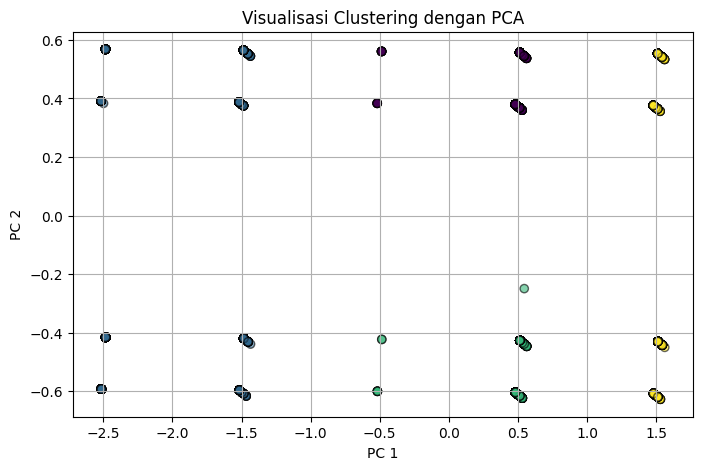

In [8]:
#Visualisasi Hasil Clustering Menggunakan Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Visualisasi Clustering dengan PCA")
plt.grid(True)
plt.show()

**Visualisasi Hasil Clustering**

Visualisasi hasil clustering setelah dilakukan feature selection dan PCA menunjukkan distribusi cluster yang cukup terpisah secara visual. Hal ini mendukung hasil silhouette score sebelumnya sebesar 0.7589, yang menunjukkan bahwa pemisahan antar cluster sudah sangat baik. Distribusi ini mengindikasikan bahwa data memiliki struktur yang lebih jelas dan representatif setelah dilakukan pemilihan fitur dan reduksi dimensi, sehingga proses clustering menjadi lebih optimal.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [9]:
#Menambahkan kolom cluster
health_df['Cluster'] = kmeans_selected.labels_

#Membuat mapping invers untuk setiap kolom kategorikal
reverse_mapping_dict = {
    'gender': {v: k for k, v in mapping_dict['gender'].items()},
    'ever_married': {v: k for k, v in mapping_dict['ever_married'].items()},
    'work_type': {v: k for k, v in mapping_dict['work_type'].items()},
    'Residence_type': {v: k for k, v in mapping_dict['Residence_type'].items()},
    'smoking_status': {v: k for k, v in mapping_dict['smoking_status'].items()},
}

#Invers transform
for col, reverse_mapping in reverse_mapping_dict.items():
    health_df[col] = health_df[col].map(reverse_mapping)


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [10]:
#Infers transform kolom numerikal
numerical_features = ['age', 'avg_glucose_level', 'bmi']
health_df[numerical_features] = scaler.inverse_transform(health_df[numerical_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Ringkasan per Cluster:


,heart_disease,hypertension,Residence_type,gender,work_type
Cluster,,,,,
0,5.21,9.61,Urban,Female,Private
1,2.75,5.43,Urban,Female,children
2,5.51,9.46,Rural,Female,Private
3,9.89,17.58,Urban,Female,Self-employed



Agregasi Numerik (min, max, mean):


age              avg_glucose_level                   bmi        \
          min   max   mean               min     max    mean   min   max   
Cluster                                                                    
0         8.0  79.0  45.60              60.7  216.38  106.32  17.7  42.7   
1         5.0  79.0  28.91              60.7  216.38  100.68  17.7  42.7   
2        13.0  79.0  44.86              60.7  216.38  105.76  17.7  42.7   
3         7.0  79.0  60.00              60.7  216.38  111.59  17.7  42.7   

                
          mean  
Cluster         
0        29.81  
1        25.33  
2        29.81  
3        29.86

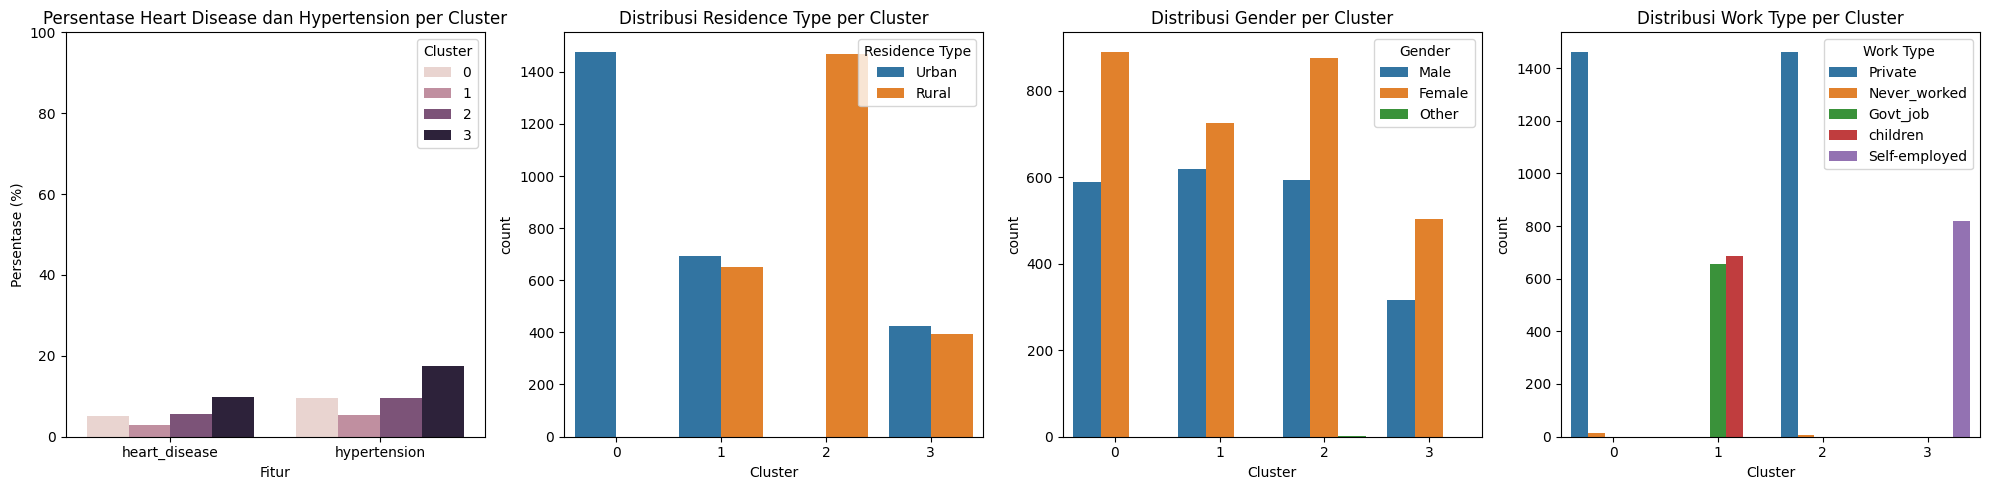

In [17]:
#EDA Agregasi per Cluster

#Mengelompokkan fitur yang digunakan
boolean_features = ['heart_disease', 'hypertension']
categorical_features = ['Residence_type', 'gender', 'work_type']

#Menghitung persentase per cluster untuk fitur boolean
boolean_summary = health_df.groupby('Cluster')[boolean_features].mean() * 100
boolean_summary = boolean_summary.round(2)

#Mengambil modus per cluster untuk fitur kategorikal
categorical_summary = {}
for feature in categorical_features:
    categorical_summary[feature] = health_df.groupby('Cluster')[feature].agg(lambda x: x.mode().iloc[0])
categorical_summary_df = pd.DataFrame(categorical_summary)

#Agregasi min, max, mean untuk fitur numerik
numeric_features = health_df.select_dtypes(include='number').columns.tolist()
numeric_features = [f for f in numeric_features if f not in boolean_features + ['Cluster']]

numeric_agg = health_df.groupby('Cluster')[numeric_features].agg(['min', 'max', 'mean']).round(2)

#Menggabungkan ringkasan
summary = pd.concat([boolean_summary, categorical_summary_df], axis=1)
print("Ringkasan per Cluster:")
display(summary)

print("\nAgregasi Numerik (min, max, mean):")
display(numeric_agg)

#Visualisasi Distribusi

#Persiapan data boolean untuk visualisasi
boolean_long = health_df[['Cluster'] + boolean_features].melt(id_vars='Cluster', var_name='Feature', value_name='Value')
boolean_summary_long = boolean_long.groupby(['Cluster', 'Feature'])['Value'].mean().reset_index()
boolean_summary_long['Value'] *= 100

#Plotting
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

#Plot fitur boolean
sns.barplot(data=boolean_summary_long, x='Feature', y='Value', hue='Cluster', ax=axes[0])
axes[0].set_title('Persentase Heart Disease dan Hypertension per Cluster')
axes[0].set_ylabel('Persentase (%)')
axes[0].set_xlabel('Fitur')
axes[0].set_ylim(0, 100)
axes[0].legend(title='Cluster')

#Plot fitur Kategorikal
for i, feature in enumerate(categorical_features):
    sns.countplot(data=health_df, x='Cluster', hue=feature, ax=axes[i + 1])
    axes[i + 1].set_title(f'Distribusi {feature.replace("_", " ").title()} per Cluster')
    axes[i + 1].legend(title=feature.replace("_", " ").title(), loc='best')

plt.tight_layout()
plt.show()


Tulis hasil interpretasinya di sini.

##Cluster 0: Kelompok dengan gaya hidup urban dan potensi risiko kesehatan menengah
- **Rata-rata age:**  45.6, dengan minimum 8.0 dan maksimum 79.0.
- **Rata-rata avg glucose level:** 106.32, dengan minimum 60.7 dan maksimum 216.38.
- **Rata-rata bmi:**  29.81, dengan minimum 17.7 dan maksimum 42.7.
- **Dominasi variabel Residence type:** kategori 'Urban'.
- **Dominasi variabel gender:** kategori 'Female'.
- **Dominasi variabel work type:** kategori 'Private'.

**Analisis:**
Klaster ini didominasi oleh perempuan dewasa yang tinggal di daerah urban dan bekerja di sektor privat. Mereka memiliki rata-rata usia dan tingkat glukosa sedang, serta BMI cukup tinggi. Ini menunjukkan kelompok dengan gaya hidup urban dan potensi risiko kesehatan menengah.

##Cluster 1: Kelompok usia muda dengan risiko kesehatan rendah dan dominasi kategori anak-anak
- **Rata-rata age:**  28.91, dengan minimum 5.0 dan maksimum 79.0.
- **Rata-rata avg glucose level:**  100.68, dengan minimum 60.7 dan maksimum 216.38.
- **Rata-rata bmi:**  25.33, dengan minimum 17.7 dan maksimum 42.7.
- **Dominasi variabel Residence type:** kategori 'Urban'.
- **Dominasi variabel gender:** kategori 'Female'.
- **Dominasi variabel work type:** kategori 'children'.

**Analisis:**
Klaster ini terdiri dari anak-anak atau remaja perempuan yang tinggal di perkotaan, dengan mayoritas tidak bekerja (kategori children). Memiliki rata-rata usia paling muda, BMI paling rendah, dan tingkat glukosa juga paling rendah. Ini adalah kelompok usia muda dengan risiko kesehatan rendah.

##Cluster 2: Kelompok rural usia produktif dengan risiko kesehatan menengah
- **Rata-rata age:**  44.86, dengan minimum 13.0 dan maksimum 79.0.
- **Rata-rata avg glucose level:**  105.76, dengan minimum 60.7 dan maksimum 216.38.
- **Rata-rata bmi:**  29.81, dengan minimum 17.7 dan maksimum 42.7.
- **Dominasi variabel Residence type:** kategori 'Rural'.
- **Dominasi variabel gender:** kategori 'Female'.
- **Dominasi variabel work type:** kategori 'Private'.

**Analisis:**
Kelompok ini mirip dengan Klaster 0 dari sisi usia dan kesehatan, namun tinggal di daerah pedesaan. Mereka juga mayoritas perempuan dan bekerja di sektor privat. Dengan usia menengah dan BMI tinggi, mereka mencerminkan komunitas rural yang produktif secara usia namun berisiko serupa dengan Klaster 0.

##Cluster 3: Kelompok lansia urban dengan risiko kesehatan tinggi
- **Rata-rata age:**  60.0, dengan minimum 7.0 dan maksimum 79.0.
- **Rata-rata avg glucose level:**  111.59, dengan minimum 60.7 dan maksimum 216.38.
- **Rata-rata bmi:**  29.86, dengan minimum 17.7 dan maksimum 42.7.
- **Dominasi variabel Residence type:** kategori 'Urban'.
- **Dominasi variabel gender:** kategori 'Female'.
- **Dominasi variabel work type:** kategori 'Self-employed'.

**Analisis:**
Klaster ini berisi perempuan lanjut usia yang tinggal di wilayah urban dan bekerja secara mandiri (self-employed). Mereka memiliki rata-rata usia paling tinggi, serta glukosa dan BMI yang juga tinggi. Kelompok ini mencerminkan segmen populasi senior dengan potensi risiko kesehatan yang lebih tinggi.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [18]:
health_df.to_csv('health_data_results.csv', index=False)
print(health_df.head())
from google.colab import files
files.download('health_data_results.csv')

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  79.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  Cluster  
0          Urban             216.38  36.6  formerly smoked        0  
1          Rural             202.21  28.1     never smoked        3  
2          Rural             105.92  32.5     never smoked        2  
3          Urban             171.23  34.4           smokes        0  
4          Rural             174.12  24.0     never smoked        3  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>